<b style="font-size:150%;"> This script makes an exploratory data analysis (EDA) of the hard drive disks. <br>
</b> 

<p style="font-size:120%;"> 
The steps to make an EDA are: <br>
1. Start with some simple questions. <br>
2. Visualize those questions. <br>
3. Look at for trends and correlations among variables. <br>
I will proceed with these steps bellow.
</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker
import seaborn
%matplotlib inline

In [2]:
## matplotlib settings
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize']=16,10
plt.rcParams.update({'font.size': 12, 
                            'font.family': 'STIXGeneral', 
                            'mathtext.fontset': 'stix'})

In [3]:
# seaborn settings
seaborn.set_palette('deep', desat=.6)

In [4]:
data= pd.read_csv('hard_drive_data_2015.csv')
data= data.drop('Unnamed: 0', 1)

In [5]:
data.head(5)

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_5_normalized,smart_5_raw,smart_9_normalized,smart_9_raw,smart_12_normalized,smart_12_raw,smart_194_normalized,smart_194_raw
0,2015-01-01,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,3.000593e+12,0.0,100.0,0.0,143.0,540.0,100.0,0.0,98.0,19169.0,100.0,14.0,253.0,22.0
1,2015-01-01,MJ0351YNG9WJSA,Hitachi HDS5C3030ALA630,3.000593e+12,0.0,100.0,0.0,127.0,556.0,100.0,2.0,98.0,19235.0,100.0,19.0,250.0,24.0
2,2015-01-01,MJ0351YNG9Z7LA,Hitachi HDS5C3030ALA630,3.000593e+12,0.0,100.0,0.0,124.0,566.0,100.0,0.0,98.0,18732.0,100.0,18.0,250.0,24.0
3,2015-01-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,3.000593e+12,0.0,100.0,0.0,137.0,507.0,100.0,0.0,98.0,17879.0,100.0,15.0,222.0,27.0
4,2015-01-01,PL1321LAG34XWH,Hitachi HDS5C4040ALE630,4.000787e+12,0.0,100.0,0.0,131.0,514.0,100.0,0.0,98.0,15829.0,100.0,29.0,206.0,29.0


<b style= "font-size: 120%;">  1. Start with two or three simple questions.   </b>

<p style="font-size:120%;"> 
1.1 How many models are in the data set? 
</p>

In [6]:
data.model.nunique()

78

<p style="font-size:120%;"> 
1.2 How many disks are in the data set? 
</p>

In [7]:
data.serial_number.nunique()

62898

<p style="font-size:120%;"> 
1.3 How many capacity bytes are there in the data set? 
</p>

In [8]:
data.capacity_bytes.nunique()

14

<p style="font-size:120%;"> 
1.4. What are the fractions of failed and working disks of the population?
</p>

In [9]:
disks= pd.DataFrame(data.groupby(['serial_number']).failure.sum()).reset_index()
sd= disks[disks.failure==0]
fd= disks[disks.failure==1]
nsd= sd.serial_number.nunique()
nfd= fd.serial_number.nunique()
total_disks= nsd+ nfd
print ('failed disks:', nfd/total_disks, '=', nfd, '\n', 'working disks:', nsd/total_disks,'=', nsd,'\n', 'total:',(nfd/total_disks)+ (nsd/total_disks),'=' ,total_disks)

failed disks: 0.022671987535176557 = 1426 
 working disks: 0.9773280124648235 = 61471 
 total: 1.0 = 62897


<b style= "font-size: 120%;"> 2. Make visualizations from the questions that were postulated   </b>

<p style= "font-size: 120%;"> 
There are 78 models and the failure rate in overall is small. <br>
a. How is the failure rate as a function of the model? <br>
(this is to know the best/worst models)<br>
b. How is the failure rate as a function of the capacity? <br>
</p>

<p style="font-size:120%;"> 
a. Failure rate as a function of the model: 
</p>

In [10]:
Ndisk= pd.DataFrame(data.groupby(['model']).serial_number.nunique()).reset_index()
Fdisk= pd.DataFrame(data.groupby(['model']).failure.sum()).reset_index()
T_merged= Ndisk.merge(Fdisk, how= 'inner', on='model')
T_merged['working_disks']= T_merged.serial_number- T_merged.failure
T_merged['failure_rate']= T_merged.failure/ T_merged.serial_number
T_merged.columns= ['model', 'total_disks', 'failure_disks', 'working_disks', 'failure_rate']
T_merged['success_rate']= T_merged.working_disks/ T_merged.total_disks
T_merged= T_merged.sort_values(by='failure_rate', ascending=False)
T_merged.head()

,model,total_disks,failure_disks,working_disks,failure_rate,success_rate
16,ST1500DL003,24,13.0,11.0,0.541667,0.458333
29,ST320005XXXX,2,1.0,1.0,0.500000,0.500000
51,WDC WD1600BPVT,2,1.0,1.0,0.500000,0.500000
54,WDC WD2500AAJS,3,1.0,2.0,0.333333,0.666667
72,WDC WD800AAJB,16,5.0,11.0,0.312500,0.687500


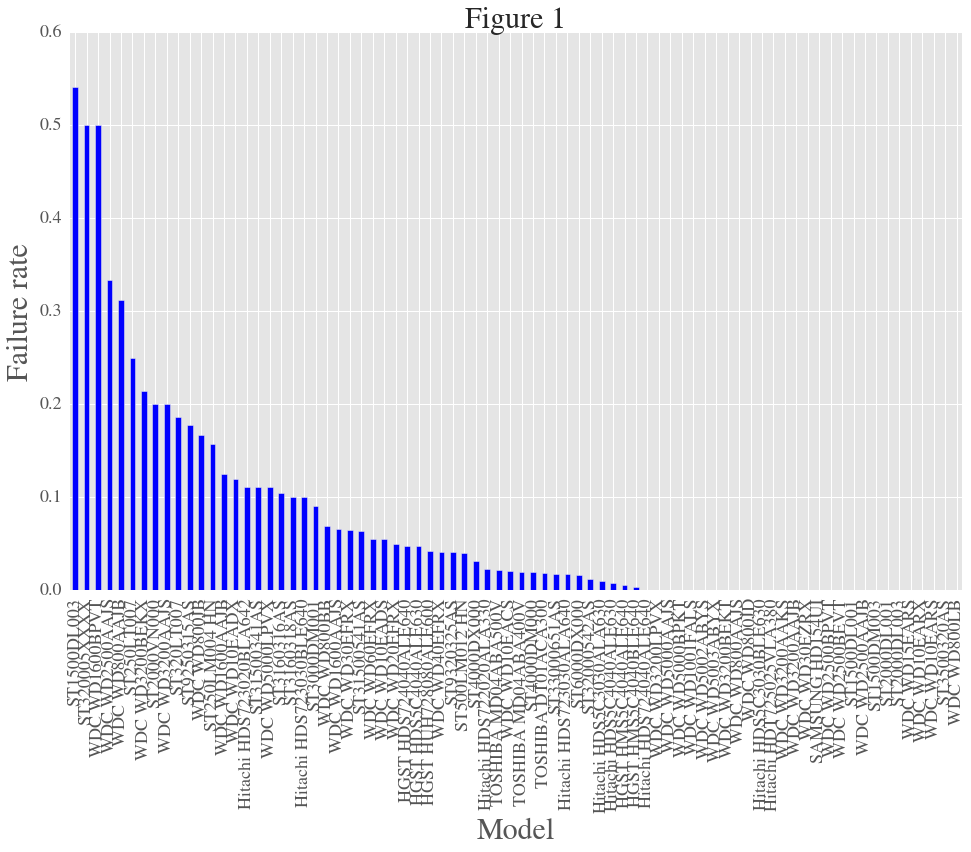

In [11]:
ax= plt.figure(figsize=(16,10))
ax= T_merged.plot(kind='bar', x='model', y='failure_rate',
               fontsize= 18, legend=False, color= 'blue')
ax.set_xlabel('Model', fontsize=30)
ax.set_ylabel('Failure rate', fontsize=30)
ax.set_title('Figure 1', fontsize=30)

<p style="font-size:120%;"> 
b. Failure rate as a function of Capacity: 
</p>

In [12]:
### 2. Find failure rate as a function of capacity
NdiskC= pd.DataFrame(data.groupby(['capacity_bytes']).serial_number.nunique()).reset_index()
FdiskC= pd.DataFrame(data.groupby(['capacity_bytes']).failure.sum()).reset_index()
T_m1= NdiskC.merge(FdiskC, how= 'inner', on='capacity_bytes')
T_m1.columns= ['capacity_bytes', 'total_disks', 'damaged_disks']
T_m1['working_disks']= T_m1.total_disks- T_m1.damaged_disks
T_m1['failure_rate']= T_m1.damaged_disks/ T_m1.total_disks 
T_m1['success_rate']= T_m1.working_disks/ T_m1.total_disks 
T_m1.capacity_bytes /= 1e9
T_m1.capacity_bytes= T_m1.capacity_bytes.round(2) 
T_m1.head()

,capacity_bytes,total_disks,damaged_disks,working_disks,failure_rate,success_rate
0,80.03,96,11.0,85.0,0.114583,0.885417
1,160.04,223,20.0,203.0,0.089686,0.910314
2,250.00,1,0.0,1.0,0.000000,1.000000
3,250.06,117,19.0,98.0,0.162393,0.837607
4,320.07,135,21.0,114.0,0.155556,0.844444


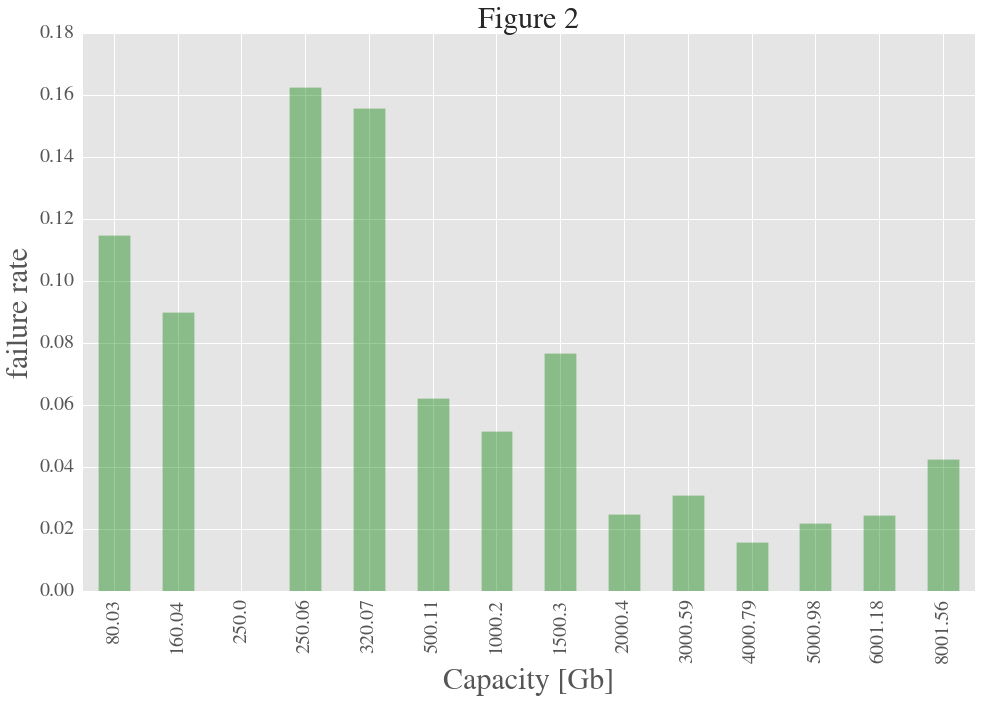

In [13]:
ax= plt.figure(figsize=(8,8))
ax= T_m1.plot(kind='bar', x= 'capacity_bytes', y= 'failure_rate',
          fontsize= 20, legend=False, color= 'green', alpha=0.4)
ax.set_xlabel('Capacity [Gb]', fontsize= 30)
ax.set_ylabel('failure rate', fontsize= 30)
ax.set_title('Figure 2', fontsize=30)

<p style="font-size:120%;"> 
c. Dependence between model, capacity and failure rate:
</p>

In [14]:
NdiskMC= pd.DataFrame(data.groupby(['model','capacity_bytes']).serial_number.nunique()).reset_index()
FdiskMC= pd.DataFrame(data.groupby(['model','capacity_bytes']).failure.sum()).reset_index()
T_m2= NdiskMC.merge(FdiskMC)
T_m2.columns= ['model','capacity_bytes', 'total_disks', 'damaged_disks']
T_m2['working_disks']= T_m2.total_disks- T_m2.damaged_disks
T_m2['failure_rate']= T_m2.damaged_disks/ T_m2.total_disks 
T_m2['success_rate']= T_m2.working_disks/ T_m2.total_disks 
T_m2.capacity_bytes /= 1e9
T_m2.capacity_bytes= T_m2.capacity_bytes.round(2) 
T_m2.head()

,model,capacity_bytes,total_disks,damaged_disks,working_disks,failure_rate,success_rate
0,HGST HDS5C4040ALE630,4000.79,63,3.0,60.0,0.047619,0.952381
1,HGST HDS724040ALE640,4000.79,42,2.0,40.0,0.047619,0.952381
2,HGST HMS5C4040ALE640,4000.79,7129,43.0,7086.0,0.006032,0.993968
3,HGST HMS5C4040BLE640,4000.79,3103,12.0,3091.0,0.003867,0.996133
4,HGST HUH728080ALE600,8001.56,47,2.0,45.0,0.042553,0.957447


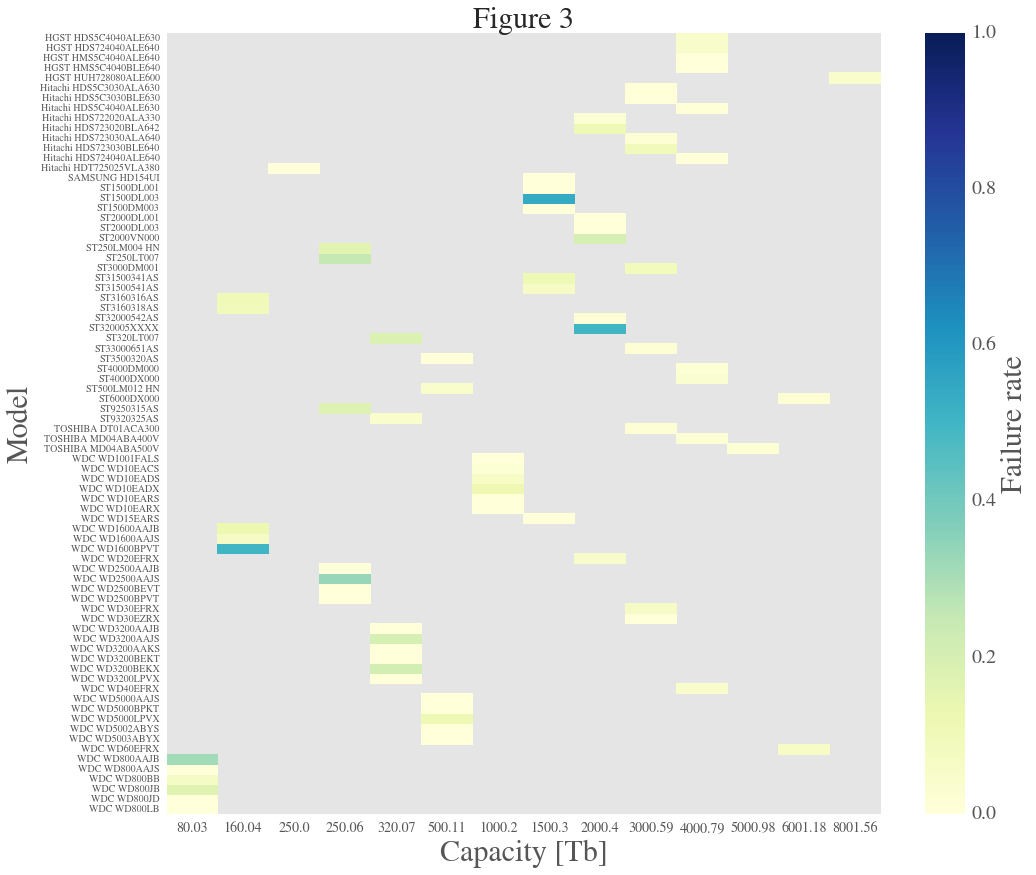

In [15]:
T= T_m2.pivot('model', 'capacity_bytes', 'failure_rate')
ax= plt.figure(figsize=(16,14))
ax= seaborn.heatmap(T, cmap="YlGnBu", vmin= 0, vmax= 1)
ax.set_xlabel('Capacity [Tb]', fontsize= 30)
ax.set_ylabel('Model', fontsize= 30)
ax.set_title('Figure 3', fontsize=30)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=20)
cax.set_ylabel('Failure rate', fontsize= 30)


In [16]:
time_life= pd.DataFrame(data.groupby('model').smart_9_raw.mean()).reset_index()
time_life.smart_9_raw/=(24.*365) # to years
time_life.columns=['model', 'running_time']
T_m3= T_m2.merge(time_life)
T_m3.running_time= T_m3.running_time.round(2)

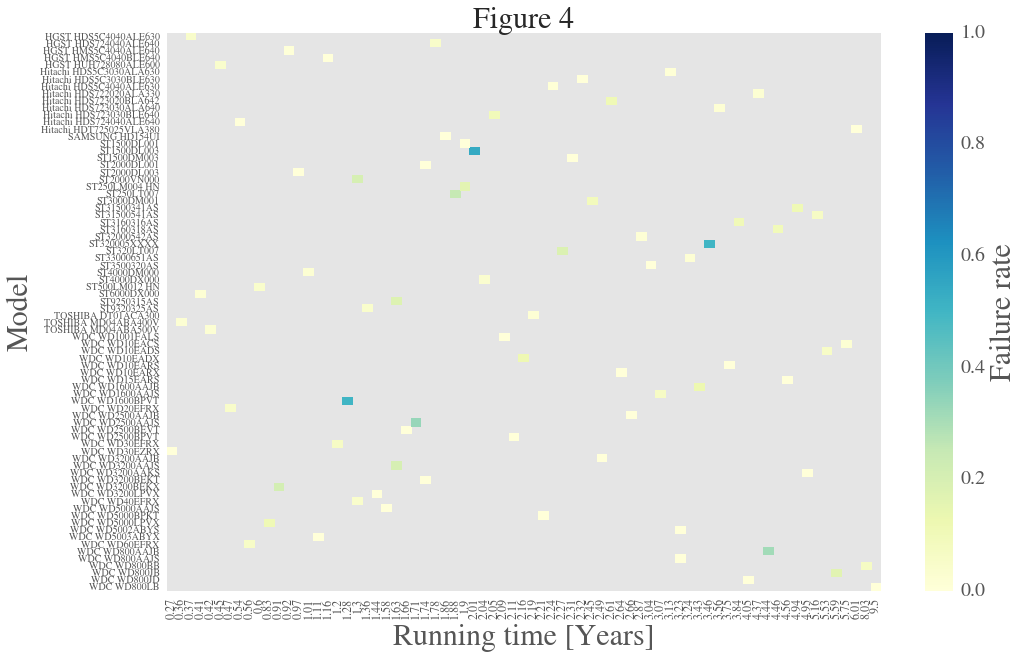

In [17]:
T1= T_m3.pivot('model', 'running_time', 'failure_rate')
ax= plt.figure(figsize=(16,10))
ax= seaborn.heatmap(T1, cmap="YlGnBu", vmin= 0, vmax= 1)
ax.set_xlabel('Running time [Years]', fontsize= 30)
ax.set_ylabel('Model', fontsize= 30)
ax.set_title('Figure 4', fontsize=30)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(12)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=20)
cax.set_ylabel('Failure rate', fontsize= 30)

<b style= "font-size: 130%;"> Conclussions from Sects 1 and 2: </b>

<p style= "font-size: 120%;">
From a basic exploration of the dataset, I found that the population of hard disks contains: <br>
- 78 different models. <br>
- 62898 hard drive disks. <br>
- 14 different capacity bytes. <br>
Additionally I found that the percentage of failed and working disks is 2% and 98% respectively, which means that the fraction of damaged disks
is very low in the population. <br> <br>

The computation of the failure rate (or percentage) as a function of the model gives information on the best and worst models in the population. From Fig. 1 we can observe that the worst models are: ST1500DL003, ST320005XXXX and WDC WD1600BPVT with failure rates of 0.54 and 0.5 respectively. The disks of these models have worked during 1.5 and 3.6 years on average (see Fig. 4). <br>
I found on the other hand that 28 models had a cero failure rate. <br>

I also analyzed the failure rate as a function of capacity, as can be observed in Fig. 2. Note that disks of 250 and 320 Gb have bigger failure rate, but this is not higher than 0.2. 
</p>

<b style= "font-size: 120%;"> 3. Find correlations or trends:
</b>
<p style= "font-size: 120%;">
Here I will classify the data into failed and working disks 
and I will explore the correlations among S.M.A.R.T. attributes. <br>
</p>

<p style= "font-size: 120%;">
Failed disks:
</p>

In [18]:
fail= pd.DataFrame(data[data.failure==1]).reset_index()
fail= fail.drop('index', 1)
fail.serial_number.nunique()

1427

<p style= "font-size: 120%;">
Success disks:
</p>

In [19]:
success= data.groupby(['serial_number']).filter(lambda x: x['failure'].sum()==0) 
succ= pd.DataFrame(success.groupby(['serial_number']).tail(n=1)).reset_index()
succ= succ.drop('index', 1)
succ.serial_number.nunique()

61471

<p style= "font-size: 120%;">
As I explain above, sucess disks are too much compared with failed disks. In order to make comparisons, I will choose a random sample of success disks that is equal to the number of failed disks:
</p>

In [20]:
succ_sample= pd.DataFrame(succ.sample(n= fail.serial_number.nunique()+1)).reset_index()
succ_sample= succ_sample.drop('index', 1)

<p style= "font-size: 120%;">
Now I will concatenate this sample with the fail disks:
</p>

In [21]:
sample= pd.concat([succ_sample, fail], ignore_index=True)
sample.smart_3_raw= sample.smart_3_raw/1000.  # in seconds
sample.smart_9_raw= sample.smart_9_raw/(24.*365) # in hours
sample.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_5_normalized,smart_5_raw,smart_9_normalized,smart_9_raw,smart_12_normalized,smart_12_raw,smart_194_normalized,smart_194_raw
0,2015-05-05,6XW29S31,ST32000542AS,2.000399e+12,0.0,117.0,132259621.0,100.0,0.000,100.0,0.0,74.0,2.667123,100.0,39.0,19.0,19.0
1,2015-12-31,Z300ZSFB,ST4000DM000,4.000787e+12,0.0,117.0,133912832.0,93.0,0.000,100.0,0.0,81.0,1.902169,100.0,7.0,27.0,27.0
2,2015-12-31,JK11A1YAJA9GMV,Hitachi HDS722020ALA330,2.000399e+12,0.0,100.0,0.0,114.0,0.631,100.0,0.0,94.0,5.355251,100.0,56.0,181.0,33.0
3,2015-12-31,JK1101B9KN4EAF,Hitachi HDS722020ALA330,2.000399e+12,0.0,100.0,0.0,132.0,0.617,100.0,0.0,95.0,4.694521,100.0,12.0,187.0,32.0
4,2015-12-31,S301NDW6,ST4000DM000,4.000787e+12,0.0,118.0,181368352.0,92.0,0.000,100.0,0.0,99.0,0.154680,100.0,8.0,28.0,28.0


<p style= "font-size: 120%;">
a. Correlation among S.M.A.R.T attributes: 2D scatter plots 
</p>

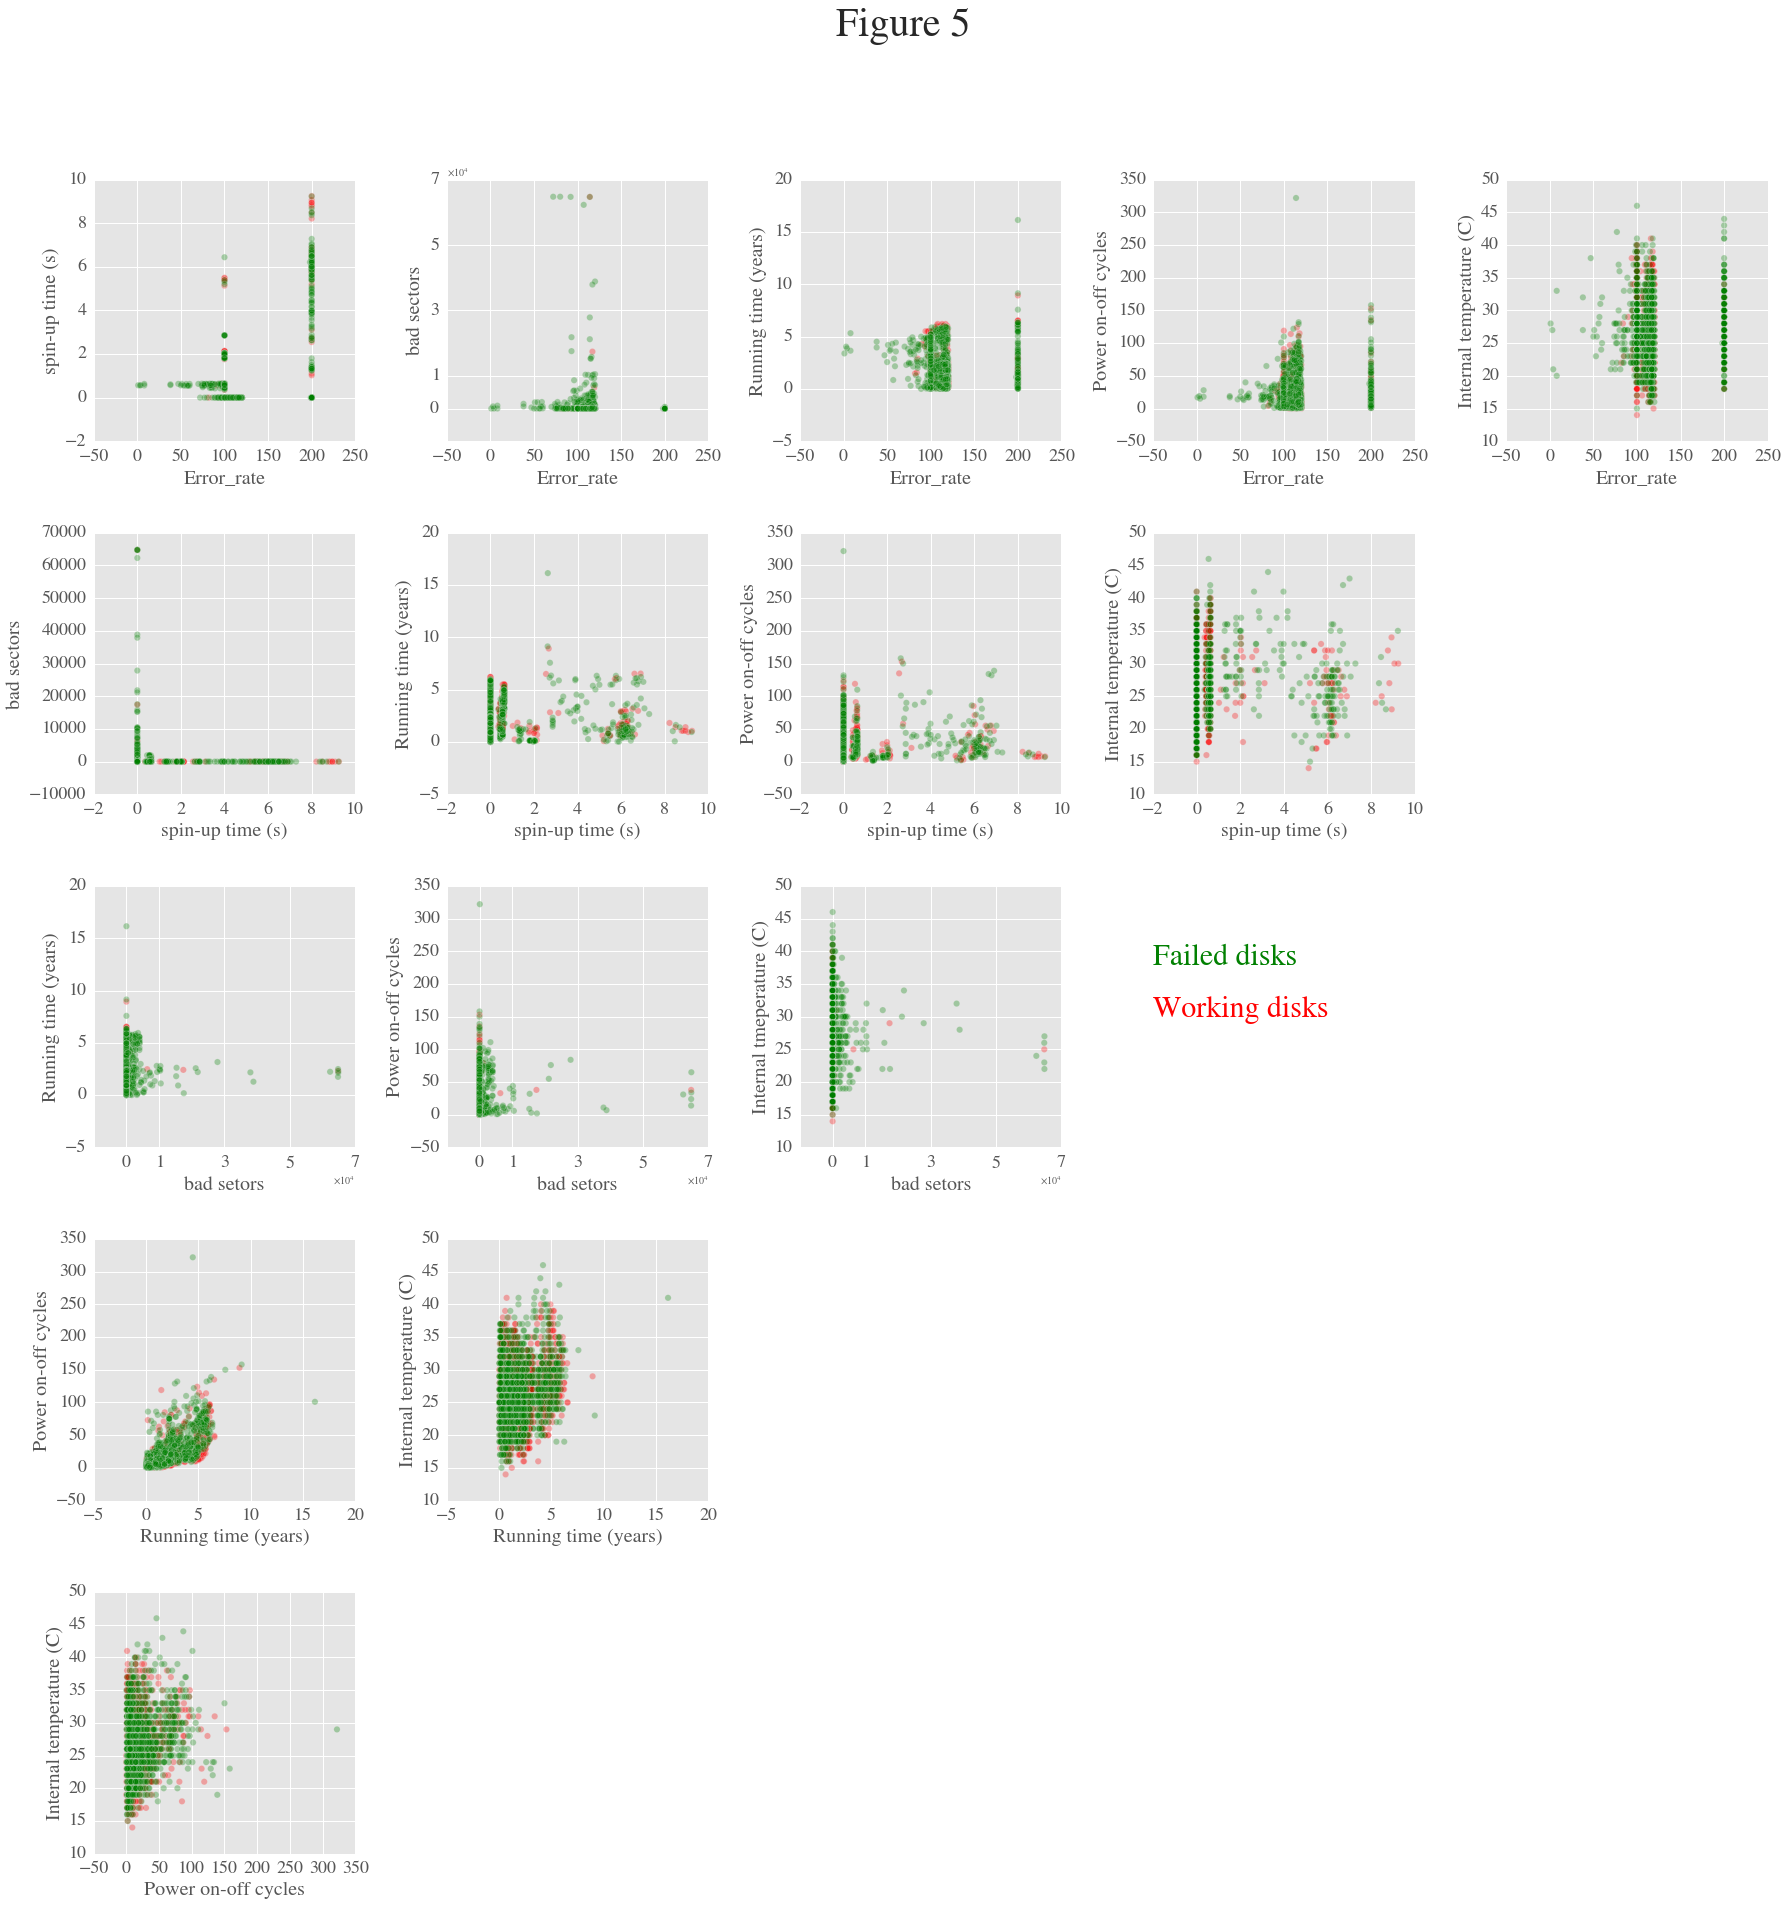

In [22]:
color= ['red' if x== 0 else 'green' for x in sample.failure]

fig = plt.figure(figsize=(30,30))
plt.subplots_adjust(wspace= 0.35, hspace= 0.35)
fig.suptitle('Figure 5', fontsize=40)

ax1= fig.add_subplot(551) 
sample.plot(kind='scatter', x='smart_1_normalized', y='smart_3_raw',
                        s=40, c= color, alpha= 0.3, ax= ax1)
ax1.set_xlabel('Error_rate', fontsize= 20)
ax1.set_ylabel('spin-up time (s)', fontsize= 20)
for tick in ax1.xaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
for tick in ax1.yaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
###################################        
ax2= fig.add_subplot(552)
sample.plot(kind='scatter', x='smart_1_normalized', y='smart_5_raw',
                        s=40, c= color, alpha= 0.3, ax= ax2)
ax2.set_xlabel('Error_rate', fontsize= 20)
ax2.set_ylabel('bad sectors', fontsize= 20)
for tick in ax2.xaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
for tick in ax2.yaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
ax2.set_yticks([0, 10000, 30000,50000,70000])
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax2.yaxis.set_major_formatter(formatter) 
###################################

ax3= fig.add_subplot(553)
sample.plot(kind='scatter', x='smart_1_normalized', y='smart_9_raw',
                        s=40, c= color, alpha= 0.3, ax= ax3)
ax3.set_xlabel('Error_rate', fontsize= 20)
ax3.set_ylabel('Running time (years)', fontsize= 20)
for tick in ax3.xaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
for tick in ax3.yaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
##################################
ax4= fig.add_subplot(554)
sample.plot(kind='scatter', x='smart_1_normalized', y='smart_12_raw',
                        s=40, c= color, alpha= 0.3, ax= ax4)
ax4.set_xlabel('Error_rate', fontsize= 20)
ax4.set_ylabel('Power on-off cycles', fontsize= 20)
for tick in ax4.xaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
for tick in ax4.yaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
#################################
ax5= fig.add_subplot(555)
sample.plot(kind='scatter', x='smart_1_normalized', y='smart_194_raw',
                        s=40, c= color, alpha= 0.3, ax= ax5)
ax5.set_xlabel('Error_rate', fontsize= 20)
ax5.set_ylabel('Internal temperature (C)', fontsize= 20)
for tick in ax5.xaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
for tick in ax5.yaxis.get_major_ticks():
               tick.label.set_fontsize(18) 

#################################
ax6= fig.add_subplot(556)
sample.plot(kind='scatter', x='smart_3_raw', y='smart_5_raw',
                        s=40, c= color, alpha= 0.3, ax= ax6)
ax6.set_xlabel('spin-up time (s)', fontsize= 20)
ax6.set_ylabel('bad sectors', fontsize= 20)
for tick in ax6.xaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
for tick in ax6.yaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
        
#################################
ax7= fig.add_subplot(557)
sample.plot(kind='scatter', x='smart_3_raw', y='smart_9_raw',
                        s=40, c= color, alpha= 0.3, ax= ax7)
ax7.set_xlabel('spin-up time (s)', fontsize= 20)
ax7.set_ylabel('Running time (years)', fontsize= 20)
for tick in ax7.xaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
for tick in ax7.yaxis.get_major_ticks():
               tick.label.set_fontsize(18) 

#################################
ax8= fig.add_subplot(558)
sample.plot(kind='scatter', x='smart_3_raw', y='smart_12_raw',
                        s=40, c= color, alpha= 0.3, ax= ax8)
ax8.set_xlabel('spin-up time (s)', fontsize= 20)
ax8.set_ylabel('Power on-off cycles', fontsize= 20)
for tick in ax8.xaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
for tick in ax8.yaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
        
#################################
ax9= fig.add_subplot(559)
sample.plot(kind='scatter', x='smart_3_raw', y='smart_194_raw',
                        s=40, c= color, alpha= 0.3, ax= ax9)
ax9.set_xlabel('spin-up time (s)', fontsize= 20)
ax9.set_ylabel('Internal temperature (C)', fontsize= 20)
for tick in ax9.xaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
for tick in ax9.yaxis.get_major_ticks():
               tick.label.set_fontsize(18) 

#################################
ax11= fig.add_subplot(5,5,11)
sample.plot(kind='scatter', x='smart_5_raw', y='smart_9_raw',
                        s=40, c= color, alpha= 0.3, ax= ax11)
ax11.set_xlabel('bad setors', fontsize= 20)
ax11.set_ylabel('Running time (years)', fontsize= 20)
for tick in ax11.xaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
for tick in ax11.yaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
ax11.set_xticks([0, 10000, 30000,50000,70000])
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax11.xaxis.set_major_formatter(formatter) 

#################################
ax12= fig.add_subplot(5,5,12)
sample.plot(kind='scatter', x='smart_5_raw', y='smart_12_raw',
                        s=40, c= color, alpha= 0.3, ax= ax12)
ax12.set_xlabel('bad setors', fontsize= 20)
ax12.set_ylabel('Power on-off cycles', fontsize= 20)
for tick in ax12.xaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
for tick in ax12.yaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
ax12.set_xticks([0, 10000, 30000,50000,70000])
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax12.xaxis.set_major_formatter(formatter) 

#################################
ax13= fig.add_subplot(5,5,13)
sample.plot(kind='scatter', x='smart_5_raw', y='smart_194_raw',
                        s=40, c= color, alpha= 0.3, ax= ax13)
ax13.set_xlabel('bad setors', fontsize= 20)
ax13.set_ylabel('Internal tmeperature (C)', fontsize= 20)
for tick in ax13.xaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
for tick in ax13.yaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
ax13.set_xticks([0, 10000, 30000,50000,70000])
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax13.xaxis.set_major_formatter(formatter)

#################################
ax14= fig.add_subplot(5,5,14)
ax14.text(0, 0.5, 'Working disks', color= 'red',fontsize= 30)
ax14.text(0, 0.7, 'Failed disks', color= 'green',fontsize= 30)
ax14.patch.set_visible(False)
ax14.axes.get_xaxis().set_visible(False)
ax14.axes.get_yaxis().set_visible(False)
#################################
ax16= fig.add_subplot(5,5,16)
sample.plot(kind='scatter', x='smart_9_raw', y='smart_12_raw',
                        s=40, c= color, alpha= 0.3, ax= ax16)
ax16.set_xlabel('Running time (years)', fontsize= 20)
ax16.set_ylabel('Power on-off cycles', fontsize= 20)
for tick in ax16.xaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
for tick in ax16.yaxis.get_major_ticks():
               tick.label.set_fontsize(18) 

#################################
ax17= fig.add_subplot(5,5,17)
sample.plot(kind='scatter', x='smart_9_raw', y='smart_194_raw',
                        s=40, c= color, alpha= 0.3, ax= ax17)
ax17.set_xlabel('Running time (years)', fontsize= 20)
ax17.set_ylabel('Internal temperature (C)', fontsize= 20)
for tick in ax17.xaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
for tick in ax17.yaxis.get_major_ticks():
               tick.label.set_fontsize(18) 

#################################
ax21= fig.add_subplot(5,5,21)
sample.plot(kind='scatter', x='smart_12_raw', y='smart_194_raw',
                        s=40, c= color, alpha= 0.3, ax= ax21)
ax21.set_xlabel('Power on-off cycles', fontsize= 20)
ax21.set_ylabel('Internal temperature (C)', fontsize= 20)
for tick in ax21.xaxis.get_major_ticks():
               tick.label.set_fontsize(18) 
for tick in ax21.yaxis.get_major_ticks():
               tick.label.set_fontsize(18)


<p style= "font-size: 120%;">
b. Distribution of S.M.A.R.T attributes for failed and success disks
</p>

<p style= "font-size: 120%;">
b.1 Distribution of Temperature
</p>

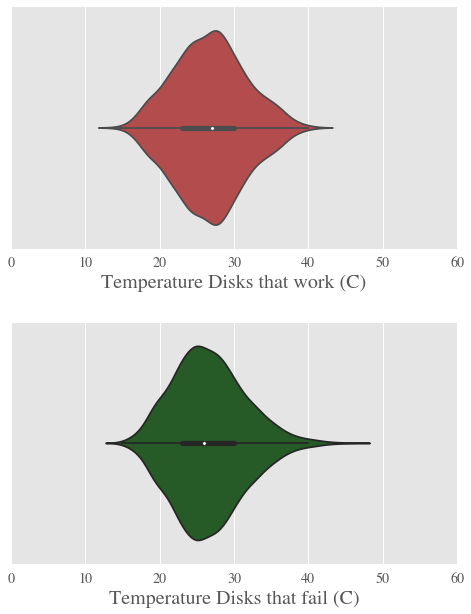

In [23]:
fig= plt.figure(figsize= (8,10))
fig.subplots_adjust(hspace=0.3)
ax= fig.add_subplot(211)
cax= seaborn.violinplot(succ_sample.smart_194_raw, 
                        color= 'red', saturation=0.4)
cax.set_xlabel('Temperature Disks that work (C)', fontsize= 20)
#cax.set_xlabel('T (Celsius)', fontsize= 14)
cax.set_xlim(0, 60)
for tick in cax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
ax= fig.add_subplot(212)
cax= seaborn.violinplot(fail.smart_194_raw, 
                        color= 'green', saturation=0.4)
cax.set_xlabel('Temperature Disks that fail (C)', fontsize= 20)
#cax.set_xlabel('T (Celsius)', fontsize= 14)
cax.set_xlim(0, 60)
for tick in cax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 



/Users/data-science/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


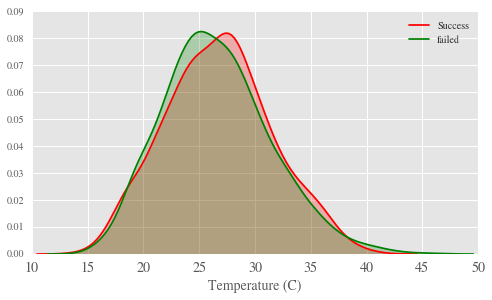

In [24]:
fig= plt.figure(figsize= (8,10))
fig.subplots_adjust(hspace=0.3)
ax= fig.add_subplot(211)
cax= seaborn.kdeplot(succ_sample.smart_194_raw, 
                     color= 'red', label= 'Success', shade='True')
cax.set_xlabel('Temperature (C)', fontsize= 14)
for tick in cax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
        
ax= fig.add_subplot(211)
cax= seaborn.kdeplot(fail.smart_194_raw,  
                     color= 'green', label='failed', shade='True')
cax.set_xlabel('Temperature (C)', fontsize= 14)
for tick in cax.xaxis.get_major_ticks():
               tick.label.set_fontsize(14) 

<p style= "font-size: 120%;">
b.2 Distribution of Running time (years)
</p>

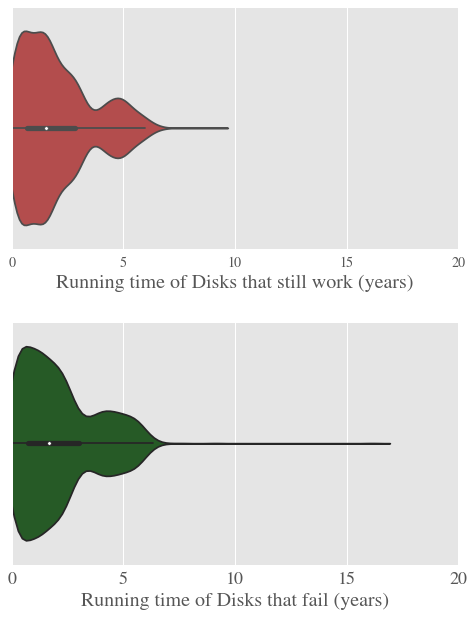

In [25]:
fig= plt.figure(figsize= (8,10))
fig.subplots_adjust(hspace=0.3)
ax= fig.add_subplot(211)
cax= seaborn.violinplot(succ_sample.smart_9_raw/(24.*365), color= 'red', saturation=0.4)
cax.set_xlabel('Running time of Disks that still work (years)', fontsize= 20)
cax.set_xlim(0, 20)
for tick in cax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
ax= fig.add_subplot(212)
cax= seaborn.violinplot(fail.smart_9_raw/(24.*365), color= 'green', saturation=0.4)
cax.set_xlabel('Running time of Disks that fail (years)', fontsize= 20)
cax.set_xlim(0, 20)
for tick in cax.xaxis.get_major_ticks():
                tick.label.set_fontsize(18) 

/Users/data-science/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


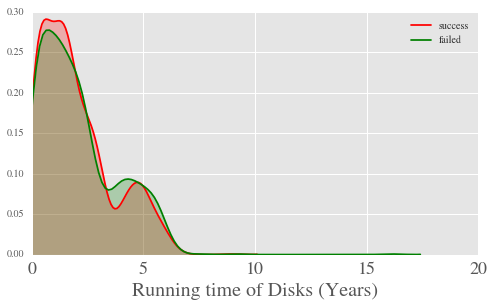

In [26]:
fig= plt.figure(figsize= (8,10))
fig.subplots_adjust(hspace=0.3)
ax= fig.add_subplot(211)
cax= seaborn.kdeplot(succ_sample.smart_9_raw/(24.*365), color= 'red', shade='True', label= 'success')
cax.set_xlabel('Running time of Disks (Years)', fontsize= 20)
cax.set_xlim(0, 20)
for tick in cax.xaxis.get_major_ticks():
                tick.label.set_fontsize(18)
ax= fig.add_subplot(211)
cax= seaborn.kdeplot(fail.smart_9_raw/(24.*365), color= 'green',shade='True', label='failed')
cax.set_xlim(0, 20)
for tick in cax.xaxis.get_major_ticks():
                tick.label.set_fontsize(18) 

<p style= "font-size: 120%;">
b.3 Distribution of spin-up time (s)
</p>

/Users/data-science/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


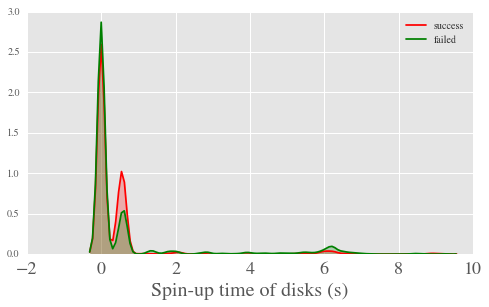

In [27]:
fig= plt.figure(figsize= (8,10))
fig.subplots_adjust(hspace=0.3)
ax= fig.add_subplot(211)
cax= seaborn.kdeplot(succ_sample.smart_3_raw/1000., color= 'red',shade='True', label='success')
cax.set_xlabel('Spin-up time of disks (s)', fontsize= 20)
for tick in cax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
ax= fig.add_subplot(211)
cax= seaborn.kdeplot(fail.smart_3_raw/1000., color= 'green',shade='True', label='failed')
cax.set_xlabel('Spin-up time of disks (s)', fontsize= 20)
for tick in cax.xaxis.get_major_ticks():
                tick.label.set_fontsize(18) 

<p style= "font-size: 120%;">
b.4 Distribution of power on-off cycles
</p>

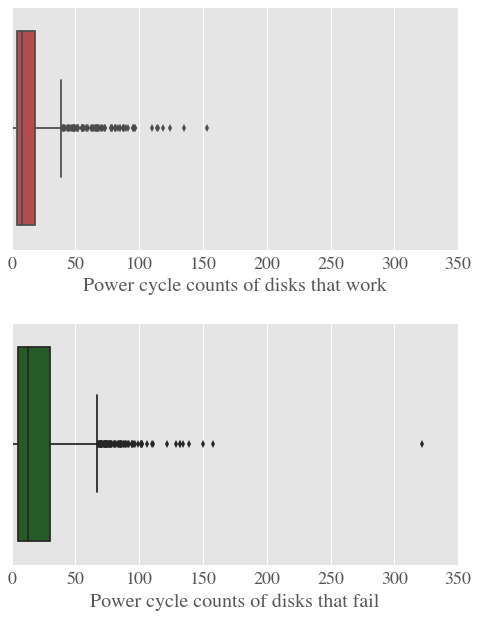

In [28]:
fig= plt.figure(figsize= (8,10))
fig.subplots_adjust(hspace=0.3)
ax= fig.add_subplot(211)
cax= seaborn.boxplot(succ_sample.smart_12_raw, 
                     color= 'red', saturation=0.4)
cax.set_xlabel('Power cycle counts of disks that work', fontsize= 20)
cax.set_xlim(0, 350)
for tick in cax.xaxis.get_major_ticks():
                tick.label.set_fontsize(18)
ax= fig.add_subplot(212)
cax= seaborn.boxplot(fail.smart_12_raw, 
                     color= 'green', saturation=0.4 )
cax.set_xlabel('Power cycle counts of disks that fail', fontsize= 20)
#cax.set_xlim(0, 20)
for tick in cax.xaxis.get_major_ticks():
               tick.label.set_fontsize(18) 

<p style= "font-size: 120%;">
b.5 Distribution of counts of bad sectors
</p>

/Users/data-science/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


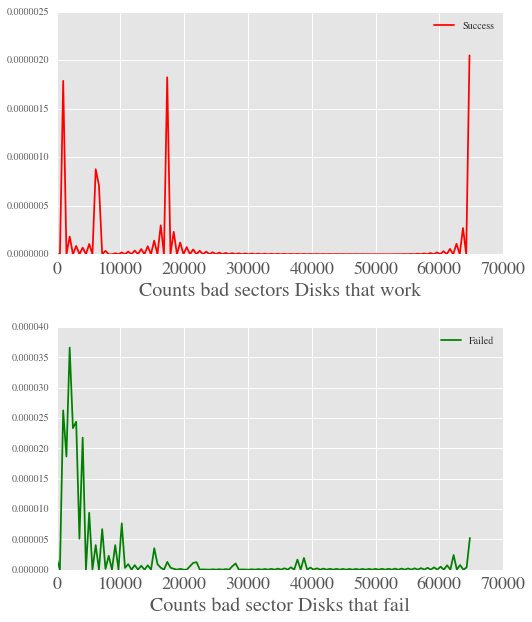

In [33]:
fig= plt.figure(figsize= (8,10))
fig.subplots_adjust(hspace=0.3)
ax= fig.add_subplot(211)
cax= seaborn.kdeplot(succ_sample.smart_5_raw, 
                     color= 'red', label= 'Success')
cax.set_xlabel('Counts bad sectors Disks that work', fontsize= 20)
cax.set_xlim(0, 70000)
for tick in cax.xaxis.get_major_ticks():
                tick.label.set_fontsize(18)
ax= fig.add_subplot(212)
cax= seaborn.kdeplot(fail.smart_5_raw, 
                     color= 'green', label= 'Failed') 
cax.set_xlabel('Counts bad sector Disks that fail', fontsize= 20)
cax.set_xlim(0, 70000)
for tick in cax.xaxis.get_major_ticks():
               tick.label.set_fontsize(18) 

<p style= "font-size: 120%;">
b.6 Distribution of counts of error rates
</p>

/Users/data-science/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


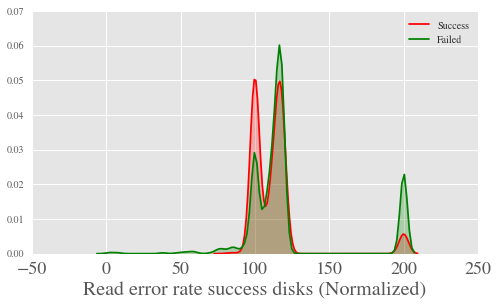

In [30]:
fig= plt.figure(figsize= (8,10))
fig.subplots_adjust(hspace=0.3)
ax= fig.add_subplot(211)
cax= seaborn.kdeplot(succ_sample.smart_1_normalized, 
                     color= 'red',shade='True', label= 'Success')
cax.set_xlabel('Read error rate success disks (Normalized)', fontsize= 20)
for tick in cax.xaxis.get_major_ticks():
                tick.label.set_fontsize(18)
ax= fig.add_subplot(211)
cax= seaborn.kdeplot(fail.smart_1_normalized, 
                     color= 'green',shade='True', label= 'Failed') 
for tick in cax.xaxis.get_major_ticks():
               tick.label.set_fontsize(18) 

<b style= "font-size: 130%;"> Conclussions from Sect. 3: </b>

<p style= "font-size: 120%;">
In Fig. 5 I show scatter plots among different S-M.A.R.T. attributes. As is observed, there are not remarkable differences between the distribution of failed disks (green points) and the distribution of working disks (red points). <br>
From the Figs. of above I can also conclude the following: <br>
- The internal temperature itself do not serve to determine which disks fail or not. <br>
- There are disks with small running time that fail (bad models).<br>
- Disks with older than 11 years are likely to fail. <br>
- There are more failed disks with more power on-off cycle counts. <br>
- The count of bad sectors depends on the sample of success disks. 
</p>

<b style= "font-size: 130%;"> Next steps? </b>
<p style= "font-size: 120%;">
Now the next step is to make a statistical analysis to obtain deeply insights from the data.
</p>